In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
dataframe = pd.read_excel("fitur_quality.xlsx")
dataframe

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,44.931388,589.049127,913.196598,532.391593,92.146597,0.088867,0.236328,0.502044,645.726979,522.580222,0.809290,0
105,NaN,59.490622,135.610427,64.607791,38.978432,47.916667,0.040039,0.272461,0.203282,45.676245,185.530246,4.061854,0
106,NaN,61.123084,127.522659,104.882885,75.627238,53.355705,0.044922,0.254883,2.447448,74.162843,164.121556,2.212989,0
107,NaN,64.437932,55.039434,52.842236,30.052714,38.993711,0.054688,0.219727,0.359295,37.364273,67.390739,1.803614,0


In [3]:
# X = dataframe[["HF", "LF/HF", "HR", "SDSD", "SD2", "LF", "pNN50", "SDNN"]]
X = dataframe[["HF", "LF/HF", "HR", "SDSD", "SD2", "LF", "pNN50"]]

num_feature = len(X.columns)


y = dataframe["Label"]

In [4]:
smote = SMOTE(random_state=42)
data_resampled, labels_resampled = smote.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data_resampled, labels_resampled, test_size=0.1, shuffle=True
)

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=32, input_shape=(num_feature,), activation="relu"),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)
print(model.summary())

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-6),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=500, batch_size=2, validation_split=0.15)

Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4748 - loss: 1.8672 - val_accuracy: 0.5200 - val_loss: 1.3505
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5796 - loss: 1.1359 - val_accuracy: 0.4800 - val_loss: 1.1611
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 1.2339 - val_accuracy: 0.4800 - val_loss: 1.0468
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5547 - loss: 1.0599 - val_accuracy: 0.5200 - val_loss: 0.9713
Epoch 5/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5743 - loss: 0.7242 - val_accuracy: 0.4400 - val_loss: 0.8773
Epoch 6/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6518 - loss: 0.6908 - val_accuracy: 0.5200 - val_loss: 0.7860
Epoch 7/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6479 - loss: 0.5808 - val_accuracy: 0.5200 - val_loss: 0.7521
Epoch 8/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6475 - loss: 0.6234 - val_accuracy: 0.5600 - v

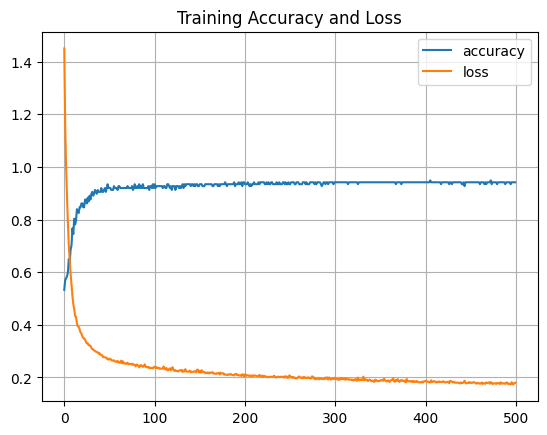

In [38]:
plt.figure()
plt.title("Training Accuracy and Loss")

plt.plot(history.history["accuracy"])

plt.plot(history.history["loss"])
plt.legend(["accuracy", "loss"])
plt.grid()

plt.show()

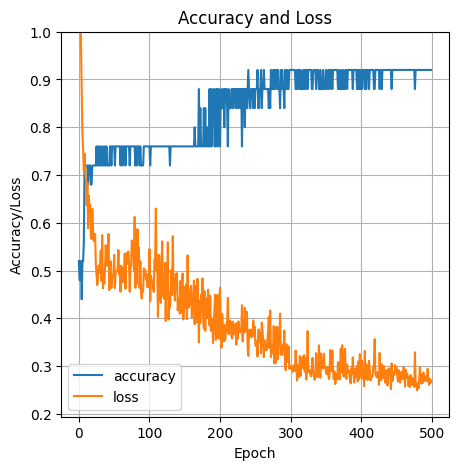

In [51]:
plt.figure(figsize=(5, 5))
plt.title("Accuracy and Loss")
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["val_loss"])
plt.legend(["accuracy", "loss"])
plt.ylim(top=1)
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")
plt.grid()
plt.show()

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - accuracy: 0.9444 - loss: 0.2450
Loss: 0.24503479897975922
Accuracy: 0.9444


In [46]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Text(113.9222222222222, 0.5, 'predicted class')

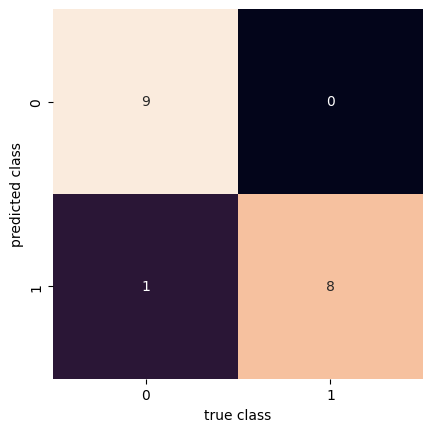

In [47]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")

In [13]:
model.save("model_sleep_quality.h5")